## Linear classifier benchmarking

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import hyperdt.benchmarking as benchmarking
from hyperdt.product_space_DT import ProductSpace
from hyperdt.product_space_perceptron import mix_curv_perceptron
from hyperdt.product_space_svm import mix_curv_svm

### Product space perceptron and SVM 

In [140]:
# Example in 2D Euclidean space
sig = [(2, 0.)]
ps = ProductSpace(sig, seed=None)
ps.sample_clusters(1000, 2, cov_scale=0.05)
ps.split_data()

In [141]:
# Fit sklearn's perceptron
perc = Perceptron()
perc.fit(ps.X_train, ps.y_train)
perc_score = f1_score(ps.y_test, perc.predict(ps.X_test), average='macro')
print(f'perc_score: {perc_score}')

perc_score: 0.9893887945670627


In [142]:
# Fit sklearn's SVM
svm = SVC()
svm.fit(ps.X_train, ps.y_train)
svm_score = f1_score(ps.y_test, svm.predict(ps.X_test), average='macro')
print(f'svm_score: {svm_score}')

svm_score: 1.0


In [143]:
# Fit product space perceptron
mix_component = benchmarking.sig_to_mix_component(sig)
embed_data = benchmarking.make_embed_data(ps.X, ps.X_train, ps.X_test, ps.y_train, ps.y_test, sig)
ps_perc = mix_curv_perceptron(mix_component, embed_data, multiclass=True, max_round=100, max_update=1000)
ps_perc_score = ps_perc.process_data()

F1 score: 0.5348977681133158 total number of testing samples: 200


In [144]:
# Fit product space SVM
ps_svm = mix_curv_svm(mix_component, embed_data)
ps_svm_score = ps_svm.process_data()

Mix curv SVM F1 score: 0.2779783393501805


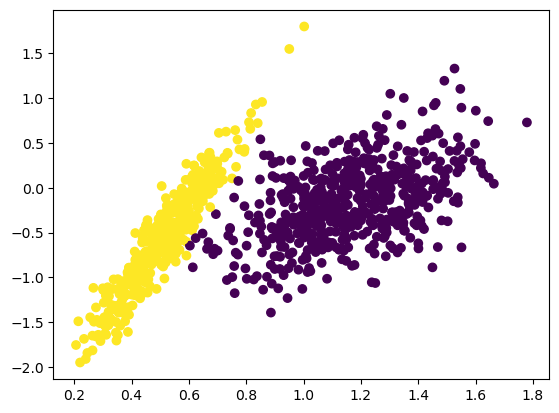

In [145]:
# Plot data with y in color
X = ps.X[:, 1:]
y = ps.y
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

### Benchmarking for HyperDT/RF, sklearn DT/RF, perceptron and SVM

In [7]:
NUM_POINTS = 1000
NUM_CLASSES = 4
signatures = [
    [(5, -1), (5, -1)],
    [(5, 1), (5, 1)],
    [(5, -1), (5, 1)],
    [(2, -1), (2, -1), (2, -1), (2, -1), (2, -1)],
    [(2, 1), (2, 1), (2, 1), (2, 1), (2, 1)],
    [(2, -1), (2, -1), (2, 0), (2, 1), (2, 1)]
]

In [8]:
seed = 0
results = []

scores_tuple = benchmarking.compute_scores_by_signature(signatures, NUM_POINTS, NUM_CLASSES, seed=seed,
                                                        max_depth=3, n_seeds=10, metric="f1")
rnd_seeds = scores_tuple[0]
psdt_scores_by_signature = scores_tuple[1]
psrf_scores_by_signature = scores_tuple[2]
dt_scores_by_signature = scores_tuple[3]
rf_scores_by_signature = scores_tuple[4]
perc_scores_by_signature = scores_tuple[5]
svm_scores_by_signature = scores_tuple[6]
ps_perc_scores_by_signature = scores_tuple[7]
ps_svm_scores_by_signature = scores_tuple[8]
for signature, psdt_score, psrf_score, dt_score, rf_score, perc_score, svm_score, ps_perc_score, ps_svm_score \
        in zip(signatures, psdt_scores_by_signature, psrf_scores_by_signature, dt_scores_by_signature,
               rf_scores_by_signature, perc_scores_by_signature, svm_scores_by_signature, 
               ps_perc_scores_by_signature, ps_svm_scores_by_signature):
    results.append({
        "signature": signature,
        "psdt_score": psdt_score,
        "psrf_score": psrf_score,
        "dt_score": dt_score,
        "rf_score": rf_score,
        "perc_score": perc_score,
        "svm_score": svm_score,
        "ps_perc_score": ps_perc_score,
        "ps_svm_score": ps_svm_score
    })

results = pd.DataFrame(results)
results

  0%|          | 0/60 [00:00<?, ?it/s]

F1 score: 0.36758528150266756 total number of testing samples: 200


  2%|▏         | 1/60 [00:08<08:34,  8.72s/it]

Mix curv SVM F1 score: 0.045454545454545456
F1 score: 0.1540133779264214 total number of testing samples: 200


  3%|▎         | 2/60 [00:23<11:47, 12.20s/it]

Mix curv SVM F1 score: 0.08158995815899582
F1 score: 0.5695754146718893 total number of testing samples: 200


  5%|▌         | 3/60 [00:35<11:33, 12.17s/it]

Mix curv SVM F1 score: 0.13503649635036497
F1 score: 0.3881508816940088 total number of testing samples: 200


  7%|▋         | 4/60 [00:48<11:46, 12.61s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.5028249035463241 total number of testing samples: 200


  8%|▊         | 5/60 [01:09<14:20, 15.65s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.2559200193306754 total number of testing samples: 200


 10%|█         | 6/60 [01:21<12:52, 14.31s/it]

Mix curv SVM F1 score: 0.09839357429718876
F1 score: 0.18773523685918236 total number of testing samples: 200


 12%|█▏        | 7/60 [01:32<11:46, 13.33s/it]

Mix curv SVM F1 score: 0.07302904564315352
F1 score: 0.2644074675324675 total number of testing samples: 200


 13%|█▎        | 8/60 [01:43<10:55, 12.61s/it]

Mix curv SVM F1 score: 0.0967741935483871
F1 score: 0.2684218041231452 total number of testing samples: 200


 15%|█▌        | 9/60 [01:55<10:32, 12.40s/it]

Mix curv SVM F1 score: 0.1124031007751938
F1 score: 0.2344275191303726 total number of testing samples: 200


 17%|█▋        | 10/60 [02:08<10:23, 12.47s/it]

Mix curv SVM F1 score: 0.1183206106870229
F1 score: 0.15204005638747772 total number of testing samples: 200


 18%|█▊        | 11/60 [02:22<10:38, 13.04s/it]

Mix curv SVM F1 score: 0.045454545454545456
F1 score: 0.1890918902251002 total number of testing samples: 200


 20%|██        | 12/60 [02:37<10:43, 13.41s/it]

Mix curv SVM F1 score: 0.08158995815899582
F1 score: 0.14198086834534568 total number of testing samples: 200


 22%|██▏       | 13/60 [02:52<11:02, 14.10s/it]

Mix curv SVM F1 score: 0.13503649635036497
F1 score: 0.20768219270127664 total number of testing samples: 200


 23%|██▎       | 14/60 [03:08<11:04, 14.45s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.21975161433727403 total number of testing samples: 200


 25%|██▌       | 15/60 [03:22<10:49, 14.44s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.14279537176272733 total number of testing samples: 200


 27%|██▋       | 16/60 [03:37<10:39, 14.54s/it]

Mix curv SVM F1 score: 0.09839357429718876
F1 score: 0.09764492753623188 total number of testing samples: 200


 28%|██▊       | 17/60 [03:52<10:31, 14.69s/it]

Mix curv SVM F1 score: 0.09349593495934959
F1 score: 0.29687578528882164 total number of testing samples: 200


 30%|███       | 18/60 [04:07<10:26, 14.91s/it]

Mix curv SVM F1 score: 0.0967741935483871
F1 score: 0.3785282750799992 total number of testing samples: 200


 32%|███▏      | 19/60 [04:23<10:21, 15.16s/it]

Mix curv SVM F1 score: 0.1124031007751938
F1 score: 0.14438236465434443 total number of testing samples: 200


 33%|███▎      | 20/60 [04:38<10:01, 15.05s/it]

Mix curv SVM F1 score: 0.1183206106870229
F1 score: 0.23985645683265477 total number of testing samples: 200


 35%|███▌      | 21/60 [04:48<08:55, 13.72s/it]

Mix curv SVM F1 score: 0.045454545454545456
F1 score: 0.2832761773608973 total number of testing samples: 200


 37%|███▋      | 22/60 [05:00<08:22, 13.23s/it]

Mix curv SVM F1 score: 0.08158995815899582
F1 score: 0.23035775278667095 total number of testing samples: 200


 38%|███▊      | 23/60 [05:15<08:22, 13.58s/it]

Mix curv SVM F1 score: 0.13503649635036497
F1 score: 0.26529605263157896 total number of testing samples: 200


 40%|████      | 24/60 [05:28<08:06, 13.52s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.17105998896219082 total number of testing samples: 200


 42%|████▏     | 25/60 [05:40<07:36, 13.05s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.15233985100120856 total number of testing samples: 200


 43%|████▎     | 26/60 [05:54<07:27, 13.17s/it]

Mix curv SVM F1 score: 0.09839357429718876
F1 score: 0.31006603194103194 total number of testing samples: 200


 45%|████▌     | 27/60 [06:06<07:09, 13.01s/it]

Mix curv SVM F1 score: 0.09349593495934959
F1 score: 0.236718650957696 total number of testing samples: 200


 47%|████▋     | 28/60 [06:18<06:47, 12.72s/it]

Mix curv SVM F1 score: 0.0967741935483871
F1 score: 0.29467000016552347 total number of testing samples: 200


 48%|████▊     | 29/60 [06:31<06:33, 12.70s/it]

Mix curv SVM F1 score: 0.1124031007751938
F1 score: 0.2779684657282707 total number of testing samples: 200


 50%|█████     | 30/60 [06:44<06:26, 12.90s/it]

Mix curv SVM F1 score: 0.1183206106870229
F1 score: 0.14412811387900357 total number of testing samples: 200


 52%|█████▏    | 31/60 [07:00<06:34, 13.61s/it]

Mix curv SVM F1 score: 0.0365296803652968
F1 score: 0.02540094113127821 total number of testing samples: 200


 53%|█████▎    | 32/60 [07:12<06:11, 13.26s/it]

Mix curv SVM F1 score: 0.08158995815899582
F1 score: 0.09349593495934959 total number of testing samples: 200


 55%|█████▌    | 33/60 [07:26<06:05, 13.54s/it]

Mix curv SVM F1 score: 0.13503649635036497
F1 score: 0.24373087385243114 total number of testing samples: 200


 57%|█████▋    | 34/60 [07:40<05:53, 13.59s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.19198071866783523 total number of testing samples: 200


 58%|█████▊    | 35/60 [07:56<05:57, 14.28s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.30901413982717985 total number of testing samples: 200


 60%|██████    | 36/60 [08:11<05:52, 14.70s/it]

Mix curv SVM F1 score: 0.09839357429718876
F1 score: 0.11169590643274854 total number of testing samples: 200


 62%|██████▏   | 37/60 [08:25<05:31, 14.40s/it]

Mix curv SVM F1 score: 0.09349593495934959
F1 score: 0.18000000000000002 total number of testing samples: 200


 63%|██████▎   | 38/60 [08:40<05:22, 14.66s/it]

Mix curv SVM F1 score: 0.0967741935483871
F1 score: 0.28103756708407873 total number of testing samples: 200


 65%|██████▌   | 39/60 [08:55<05:08, 14.68s/it]

Mix curv SVM F1 score: 0.1124031007751938
F1 score: 0.15775016350555918 total number of testing samples: 200


 67%|██████▋   | 40/60 [09:10<04:55, 14.76s/it]

Mix curv SVM F1 score: 0.1183206106870229
F1 score: 0.22045093583592704 total number of testing samples: 200


 68%|██████▊   | 41/60 [09:39<06:01, 19.02s/it]

Mix curv SVM F1 score: 0.045454545454545456
F1 score: 0.21831797836758002 total number of testing samples: 200


 70%|███████   | 42/60 [10:03<06:10, 20.59s/it]

Mix curv SVM F1 score: 0.08158995815899582
F1 score: 0.1744935090479937 total number of testing samples: 200


 72%|███████▏  | 43/60 [10:36<06:50, 24.13s/it]

Mix curv SVM F1 score: 0.13503649635036497
F1 score: 0.19499299719887958 total number of testing samples: 200


 73%|███████▎  | 44/60 [11:09<07:08, 26.79s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.18561740897806472 total number of testing samples: 200


 75%|███████▌  | 45/60 [11:37<06:49, 27.33s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.2010531952801029 total number of testing samples: 200


 77%|███████▋  | 46/60 [12:04<06:19, 27.12s/it]

Mix curv SVM F1 score: 0.09839357429718876
F1 score: 0.24615360409752932 total number of testing samples: 200


 78%|███████▊  | 47/60 [12:37<06:14, 28.78s/it]

Mix curv SVM F1 score: 0.09349593495934959
F1 score: 0.14272409249920495 total number of testing samples: 200


 80%|████████  | 48/60 [13:04<05:38, 28.24s/it]

Mix curv SVM F1 score: 0.0967741935483871
F1 score: 0.22782051282051283 total number of testing samples: 200


 82%|████████▏ | 49/60 [13:32<05:11, 28.30s/it]

Mix curv SVM F1 score: 0.1124031007751938
F1 score: 0.16019776447405149 total number of testing samples: 200


 83%|████████▎ | 50/60 [14:04<04:54, 29.48s/it]

Mix curv SVM F1 score: 0.1183206106870229
F1 score: 0.13689024390243903 total number of testing samples: 200


 85%|████████▌ | 51/60 [14:25<04:02, 26.90s/it]

Mix curv SVM F1 score: 0.037209302325581395
F1 score: 0.48129940235203394 total number of testing samples: 200


 87%|████████▋ | 52/60 [14:43<03:13, 24.24s/it]

Mix curv SVM F1 score: 0.08158995815899582
F1 score: 0.31294161232296447 total number of testing samples: 200


 88%|████████▊ | 53/60 [15:06<02:46, 23.82s/it]

Mix curv SVM F1 score: 0.13503649635036497
F1 score: 0.1950581395348837 total number of testing samples: 200


 90%|█████████ | 54/60 [15:27<02:18, 23.02s/it]

Mix curv SVM F1 score: 0.059130434782608696
F1 score: 0.08752899476139592 total number of testing samples: 200


 92%|█████████▏| 55/60 [15:48<01:52, 22.46s/it]

Mix curv SVM F1 score: 0.07264957264957266
F1 score: 0.21271068530697174 total number of testing samples: 200


 93%|█████████▎| 56/60 [16:09<01:27, 21.92s/it]

Mix curv SVM F1 score: 0.09839357429718876
F1 score: 0.15308582449373193 total number of testing samples: 200


 95%|█████████▌| 57/60 [16:31<01:06, 22.08s/it]

Mix curv SVM F1 score: 0.09349593495934959
F1 score: 0.11255343003293392 total number of testing samples: 200


 97%|█████████▋| 58/60 [16:52<00:43, 21.65s/it]

Mix curv SVM F1 score: 0.0967741935483871
F1 score: 0.29350565370072657 total number of testing samples: 200


 98%|█████████▊| 59/60 [17:13<00:21, 21.47s/it]

Mix curv SVM F1 score: 0.1124031007751938
F1 score: 0.21400818705335461 total number of testing samples: 200


100%|██████████| 60/60 [17:36<00:00, 17.61s/it]

Mix curv SVM F1 score: 0.1183206106870229


,signature,psdt_score,psrf_score,dt_score,rf_score,perc_score,svm_score,ps_perc_score,ps_svm_score
0,"[(5, -1), (5, -1)]","[0.9551573426573426, 0.9785456187895212, 0.926...","[0.9588899598884433, 0.9785456187895212, 0.925...","[0.9260686177724762, 0.8727146254515196, 0.882...","[0.9417164357381749, 0.9015478591768107, 0.882...","[0.9360406954156955, 0.9945831907857224, 0.851...","[0.4226513252829042, 0.7208117776554761, 0.539...","[0.36758528150266756, 0.1540133779264214, 0.56...","[0.045454545454545456, 0.08158995815899582, 0...."
1,"[(5, 1), (5, 1)]","[0.5155353876100239, 0.44970776424264797, 0.56...","[0.4592301855278525, 0.48272736223796936, 0.56...","[0.48822628936764145, 0.4580204903141638, 0.49...","[0.481566390413662, 0.5337546990988425, 0.5571...","[0.5652793171168018, 0.5249201427921208, 0.438...","[0.6806550459311195, 0.6939419404125287, 0.653...","[0.15204005638747772, 0.1890918902251002, 0.14...","[0.045454545454545456, 0.08158995815899582, 0...."
2,"[(5, -1), (5, 1)]","[0.9551573426573426, 0.9785456187895212, 0.926...","[0.9588899598884433, 0.9785456187895212, 0.925...","[0.9260686177724762, 0.8679546771019484, 0.882...","[0.7804181816709451, 0.9345250105691996, 0.924...","[0.9360406954156955, 0.9945831907857224, 0.883...","[0.4226513252829042, 0.7208117776554761, 0.539...","[0.23985645683265477, 0.2832761773608973, 0.23...","[0.045454545454545456, 0.08158995815899582, 0...."
3,"[(2, -1), (2, -1), (2, -1), (2, -1), (2, -1)]","[0.5221285999974525, 0.9486712901332646, 0.702...","[0.7866836859483919, 0.9434230673361108, 0.704...","[0.7072916666666667, 0.9232354034144317, 0.685...","[0.7223639642293134, 0.9284646061814557, 0.696...","[0.5960731952111262, 0.9054483938529629, 0.524...","[0.7532101751055706, 0.9112309103714138, 0.672...","[0.14412811387900357, 0.02540094113127821, 0.0...","[0.0365296803652968, 0.08158995815899582, 0.13..."
4,"[(2, 1), (2, 1), (2, 1), (2, 1), (2, 1)]","[0.46734234512476247, 0.7073675287501551, 0.38...","[0.6250351681035349, 0.6950405173757207, 0.400...","[0.3502872814870276, 0.6943961257927083, 0.395...","[0.5095859808705673, 0.7370441503040153, 0.392...","[0.4050758234328214, 0.6946057886082366, 0.396...","[0.6499747722685867, 0.7901552847898534, 0.400...","[0.22045093583592704, 0.21831797836758002, 0.1...","[0.045454545454545456, 0.08158995815899582, 0...."
5,"[(2, -1), (2, -1), (2, 0), (2, 1), (2, 1)]","[0.7492963230343687, 0.9486712901332646, 0.714...","[0.7910290460131393, 0.9434230673361108, 0.685...","[0.7005743577075099, 0.9415738498789346, 0.709...","[0.7408216933542249, 0.9350568255056898, 0.688...","[0.6707435132307799, 0.8605570291777188, 0.699...","[0.7766340802055087, 0.9220238095238095, 0.671...","[0.13689024390243903, 0.48129940235203394, 0.3...","[0.037209302325581395, 0.08158995815899582, 0...."


In [9]:
for signature, (i, row) in zip(signatures, results.iterrows()):
    psdt_scores = row["psdt_score"]
    psrf_scores = row["psrf_score"]
    dt_scores = row["dt_score"]
    rf_scores = row["rf_score"]
    perc_scores = row["perc_score"]
    svm_scores = row["svm_score"]
    ps_perc_scores = row["ps_perc_score"]
    ps_svm_scores = row["ps_svm_score"]
    s = []
    for component in signature:
        if component[1] < 0:
            s.append("H(" + f"{component[0]}, {-component[1]}" + ")")
        elif component[1] == 0:
            s.append("E(" + f"{component[0]}" + ")")
        else:
            s.append("S(" + f"{component[0]}, {component[1]}" + ")")
    print(" x ".join(s))
    print(f"Avg PSDT Score: {np.mean(psdt_scores) * 100:.1f} +/- {np.std(psdt_scores) / np.sqrt(len(psdt_scores)) * 1.96 * 100 :.1f}", end=", ")
    print(f"Avg DT Score: {np.mean(dt_scores) * 100:.1f} +/- {np.std(dt_scores) / np.sqrt(len(dt_scores)) * 1.96 * 100 :.1f}")
    
    t, p = stats.ttest_rel(psdt_scores, dt_scores)
    if p < .05:
        print("PSDT and DT are significantly different")
    
    print(f"Avg PSRF Score: {np.mean(psrf_scores) * 100:.1f} +/- {np.std(psrf_scores) / np.sqrt(len(psrf_scores)) * 1.96 * 100 :.1f}", end=", ")
    print(f"Avg RF Score: {np.mean(rf_scores) * 100:.1f} +/- {np.std(rf_scores) / np.sqrt(len(rf_scores)) * 1.96 * 100 :.1f}")

    t, p = stats.ttest_rel(psrf_scores, rf_scores)
    if p < .05:
        print("PSRF and RF are significantly different")

    print(f"Avg Perceptron Score: {np.mean(perc_scores) * 100:.1f} +/- {np.std(perc_scores) / np.sqrt(len(perc_scores)) * 1.96 * 100 :.1f}", end=", ")
    print(f"Avg SVM Score: {np.mean(svm_scores) * 100:.1f} +/- {np.std(svm_scores) / np.sqrt(len(svm_scores)) * 1.96 * 100 :.1f}")
    print(f"Avg PS Perceptron Score: {np.mean(ps_perc_scores) * 100:.1f} +/- {np.std(ps_perc_scores) / np.sqrt(len(ps_perc_scores)) * 1.96 * 100 :.1f}", end=", ")
    print(f"Avg PS SVM Score: {np.mean(ps_svm_scores) * 100:.1f} +/- {np.std(ps_svm_scores) / np.sqrt(len(ps_svm_scores)) * 1.96 * 100 :.1f}")
    
    print("")

H(5, 1) x H(5, 1)
Avg PSDT Score: 95.0 +/- 2.8, Avg DT Score: 88.6 +/- 4.3
PSDT and DT are significantly different
Avg PSRF Score: 95.3 +/- 2.9, Avg RF Score: 90.0 +/- 3.6
PSRF and RF are significantly different
Avg Perceptron Score: 95.1 +/- 2.9, Avg SVM Score: 50.5 +/- 8.3
Avg PS Perceptron Score: 31.9 +/- 8.0, Avg PS SVM Score: 9.1 +/- 1.6

S(5, 1) x S(5, 1)
Avg PSDT Score: 51.4 +/- 3.3, Avg DT Score: 47.9 +/- 2.4
Avg PSRF Score: 52.4 +/- 4.0, Avg RF Score: 50.1 +/- 2.2
Avg Perceptron Score: 38.0 +/- 5.7, Avg SVM Score: 71.0 +/- 2.7
Avg PS Perceptron Score: 19.7 +/- 5.0, Avg PS SVM Score: 9.3 +/- 1.5

H(5, 1) x S(5, 1)
Avg PSDT Score: 95.0 +/- 2.8, Avg DT Score: 88.8 +/- 4.4
PSDT and DT are significantly different
Avg PSRF Score: 95.3 +/- 2.9, Avg RF Score: 87.5 +/- 3.8
PSRF and RF are significantly different
Avg Perceptron Score: 95.7 +/- 2.4, Avg SVM Score: 50.5 +/- 8.3
Avg PS Perceptron Score: 24.6 +/- 3.0, Avg PS SVM Score: 9.3 +/- 1.5

H(2, 1) x H(2, 1) x H(2, 1) x H(2, 1) x H(